# **DATA SCIENCE TECHNICAL TEST**

##### Bibliothèques necessaires

In [ ]:
pip install pyarrow

In [ ]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00


## CHARGEMENT DES DONNEES

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cayzn.parquet to cayzn.parquet


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cayzn_test.parquet to cayzn_test.parquet


In [4]:
import pandas as pd
import pyarrow.parquet as pq

table1 = pq.read_table('cayzn.parquet')
table2 = pq.read_table('cayzn_test.parquet')

# Convertir en dataframe et fusionner
df1 = table1.to_pandas()
df2 = table2.to_pandas()

df = pd.concat([df1, df2], ignore_index=True)

print(df.head())
df.shape

   demand departure_date  destination_current_public_holiday  \
0       1     2019-03-01                                   0   
1       6     2019-03-01                                   0   
2       5     2019-03-01                                   0   
3       0     2019-03-01                                   0   
4       0     2019-03-01                                   0   

   destination_current_school_holiday  \
0                                   1   
1                                   1   
2                                   1   
3                                   1   
4                                   1   

   destination_days_to_next_public_holiday  \
0                                       52   
1                                       52   
2                                       52   
3                                       52   
4                                       52   

   destination_days_to_next_school_holiday destination_station_name  \
0                   

(665406, 30)

#### Taille des données

In [5]:
num_rows = table1.num_rows
num_columns = table1.num_columns
num_rows2 = table2.num_rows
num_columns2 = table2.num_columns

print("Nombre de lignes :", num_rows)
print("Nombre de colonnes :", num_columns)
print("Nombre de lignes2 :", num_rows2)
print("Nombre de colonnes2 :", num_columns2)


Nombre de lignes : 632841
Nombre de colonnes : 30
Nombre de lignes2 : 32565
Nombre de colonnes2 : 30


La table nous montre que nous avons 30 colonnes et 632841 lignes

#### Visualisons certaines données pour une bonne analyse

In [6]:
#df_.describe

In [7]:
df.departure_date, df.destination_station_name
#df_['origin_station_name'].unique()
#df_['sale_date'].unique()

(0         2019-03-01
 1         2019-03-01
 2         2019-03-01
 3         2019-03-01
 4         2019-03-01
              ...    
 665401    2020-10-31
 665402    2020-10-31
 665403    2020-10-31
 665404    2020-10-31
 665405    2020-10-31
 Name: departure_date, Length: 665406, dtype: object,
 0         ag
 1         ag
 2         ag
 3         ag
 4         ag
           ..
 665401    bb
 665402    bb
 665403    bb
 665404    bb
 665405    bb
 Name: destination_station_name, Length: 665406, dtype: object)

In [13]:
# noms des variables (colonnes)
noms_variables = df.columns.tolist()
print("Noms des variables :", noms_variables)

Noms des variables : ['demand', 'departure_date', 'destination_current_public_holiday', 'destination_current_school_holiday', 'destination_days_to_next_public_holiday', 'destination_days_to_next_school_holiday', 'destination_station_name', 'od_destination_time', 'od_number_of_similar_12_hours', 'od_number_of_similar_2_hours', 'od_number_of_similar_4_hours', 'od_origin_month', 'od_origin_time', 'od_origin_week', 'od_origin_weekday', 'od_origin_year', 'od_travel_time_minutes', 'origin_current_public_holiday', 'origin_current_school_holiday', 'origin_days_to_next_public_holiday', 'origin_days_to_next_school_holiday', 'origin_station_name', 'price', 'sale_date', 'sale_day', 'sale_day_x', 'sale_month', 'sale_week', 'sale_weekday', 'sale_year']


##### Valeurs manquantes et suppressiosn si elles y sont

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_station_name                        0
price     

In [9]:
missing = df.isna().sum()
print(missing.sum())
print(missing)

0
demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_station_name                        0
price   

Des valeurs manquantes présentes, elles représentent environ 2% des données, donc on peut les supprimer. (on pourra aussi utiliser une méthide d'amputation pour estimer les variables manquantes en fonction de nos données). On pourrait avoir des -1 dans cerataines variables qui représentent une valeur manquante. Vérifions:

In [10]:
# Suppression des données manquantes
donnees_manquantes = df[df.isna().any(axis=1)]

df.dropna(inplace=True)

Somme des valeurs manquantes après suppression : 0
Données supprimées :
Empty DataFrame
Columns: [demand, departure_date, destination_current_public_holiday, destination_current_school_holiday, destination_days_to_next_public_holiday, destination_days_to_next_school_holiday, destination_station_name, od_destination_time, od_number_of_similar_12_hours, od_number_of_similar_2_hours, od_number_of_similar_4_hours, od_origin_month, od_origin_time, od_origin_week, od_origin_weekday, od_origin_year, od_travel_time_minutes, origin_current_public_holiday, origin_current_school_holiday, origin_days_to_next_public_holiday, origin_days_to_next_school_holiday, origin_station_name, price, sale_date, sale_day, sale_day_x, sale_month, sale_week, sale_weekday, sale_year]
Index: []

[0 rows x 30 columns]


In [11]:
count_minus_one = df['od_number_of_similar_2_hours'].value_counts().get(-1, 0)
print("Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_2_hours' :", count_minus_one)
count_minus_one = df['od_number_of_similar_4_hours'].value_counts().get(-1, 0)
print("Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_4_hours' :", count_minus_one)
count_minus_one = df['od_number_of_similar_12_hours'].value_counts().get(-1, 0)
print("Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_12_hours' :", count_minus_one)


Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_2_hours' : 100
Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_4_hours' : 44
Nombre de occurrences de -1 dans la colonne 'od_number_of_similar_12_hours' : 44


On constate que là il y'a des valeurs manquantes en nombre faible devant le nombre total de données, donc nous allons supprimer les lignes corresponsdantes.

In [12]:
import numpy as np

# Remplacer et Supprimer les lignes avec des valeurs NaN dans les colonnes spécifiées
df.replace(-1, np.nan, inplace=True)
df.dropna(inplace=True)
print("Nombre total de lignes après suppression des lignes avec des valeurs manquantes :", len(df))

Nombre total de lignes après suppression des lignes avec des valeurs manquantes : 652045


In [14]:
#print(df.describe())

In [15]:
#print(df.destination_current_public_holiday[0:10])
#print(df.sale_date[10:20])
#print(df.sale_day[10:20])
#print(df.sale_month[10:20])
print(df.departure_date[10:20])
print(df.od_origin_year[10:20])
print(df.od_origin_month[10:20])
print(df.od_origin_weekday[10:20])

10    2019-03-01
11    2019-03-01
12    2019-03-01
13    2019-03-01
14    2019-03-01
15    2019-03-01
16    2019-03-01
17    2019-03-01
18    2019-03-01
19    2019-03-01
Name: departure_date, dtype: object
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2019
Name: od_origin_year, dtype: int64
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
Name: od_origin_month, dtype: int64
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
Name: od_origin_weekday, dtype: int64


Nous constatons que les données de jour, mois et années sont extraites de la colonne **sale_date**.\
Rassurons-nous que les valeurs de la colonne sale_day correspondent correctement aux jours extraits de la colonne sale_date, et que les valeurs de la colonne sale_month correspondent également aux mois extraits de la colonne sale_date. Si c'est le cas, nous allons supprimer la colonne sale_date et encoder les colonnes sale_month et sale_day. \
Idem pour **deparure_date**

In [16]:
import pandas as pd

# Convertir la colonne 'sale_date' en datetime et extraire le jour et le mois
df['sale_date'] = pd.to_datetime(df['sale_date'])
jours_extraits = df['sale_date'].dt.day
mois_extraits = df['sale_date'].dt.month

# Vérifier si les valeurs de 'sale_day' correspondent aux jours extraits
if (df['sale_day'] == jours_extraits).all():
    print("Les valeurs de la colonne 'sale_day' correspondent aux jours extraits de la colonne 'sale_date'.")
else:
    print("Il y a des différences entre les valeurs de la colonne 'sale_day' et les jours extraits de la colonne 'sale_date'.")

# Vérifier si les valeurs de 'sale_month' correspondent aux mois extraits
if (df['sale_month'] == mois_extraits).all():
    print("Les valeurs de la colonne 'sale_month' correspondent aux mois extraits de la colonne 'sale_date'.")
else:
    print("Il y a des différences entre les valeurs de la colonne 'sale_month' et les mois extraits de la colonne 'sale_date'.")

###############################################################

df['departure_date'] = pd.to_datetime(df['departure_date'])
années_extraits = df['departure_date'].dt.year
mois_extraits = df['departure_date'].dt.month

# Vérifier si les valeurs de 'sale_day' correspondent aux jours extraits
if (df['od_origin_year'] == jours_extraits).all():
    print("Les valeurs de la colonne 'od_origin_year' correspondent aux jours extraits de la colonne 'departure_date'.")
else:
    print("Il y a des différences entre les valeurs de la colonne 'od_origin_year' et les années extraites de la colonne 'departure_date'.")

# Vérifier si les valeurs de 'sale_month' correspondent aux mois extraits
if (df['od_origin_month'] == mois_extraits).all():
    print("Les valeurs de la colonne 'od_origin_month' correspondent aux mois extraits de la colonne 'departure_date'.")
else:
    print("Il y a des différences entre les valeurs de la colonne 'od_origin_month' et les mois extraits de la colonne 'departure_date'.")

df['departure_day']= df['departure_date'].dt.day
df['departure_year']= df['departure_date'].dt.year

Les valeurs de la colonne 'sale_day' correspondent aux jours extraits de la colonne 'sale_date'.
Les valeurs de la colonne 'sale_month' correspondent aux mois extraits de la colonne 'sale_date'.
Il y a des différences entre les valeurs de la colonne 'od_origin_year' et les années extraites de la colonne 'departure_date'.
Les valeurs de la colonne 'od_origin_month' correspondent aux mois extraits de la colonne 'departure_date'.


On a bien les résultats suggérés pour sale_date, et donc on va la supprime. Extraire les jours et années de **departure_date**

In [17]:
# Vérifier s'il n'y a que des zéros
if (df['destination_current_public_holiday'] == 0).all():
    print("Il n'y a que des zéros dans la colonne 'destination_current_public_holiday'.")
else:
    print("Il y a d'autres valeurs que zéro dans la colonne 'destination_current_public_holiday'.")

if (df['origin_current_school_holiday'] == 1).all():
    print("Il n'y a que des uns dans la colonne 'destination_current_public_holiday'.")
else:
    print("Il y a d'autres valeurs que un dans la colonne 'destination_current_public_holiday'.")

if (df['od_origin_month'] == 10).all():
    print("Il n'y a que des 10 dans la colonne 'od_origin_month'.")
else:
    print("Il y a d'autres valeurs que un dans la colonne 'od_origin_month'.")

if (df['od_origin_year'] == 2020).all():
    print("Il n'y a que des 2020 dans la colonne 'od_origin_year'.")
else:
    print("Il y a d'autres valeurs que un dans la colonne 'od_origin_month'.")

Il n'y a que des zéros dans la colonne 'destination_current_public_holiday'.
Il y a d'autres valeurs que un dans la colonne 'destination_current_public_holiday'.
Il y a d'autres valeurs que un dans la colonne 'od_origin_month'.
Il y a d'autres valeurs que un dans la colonne 'od_origin_month'.


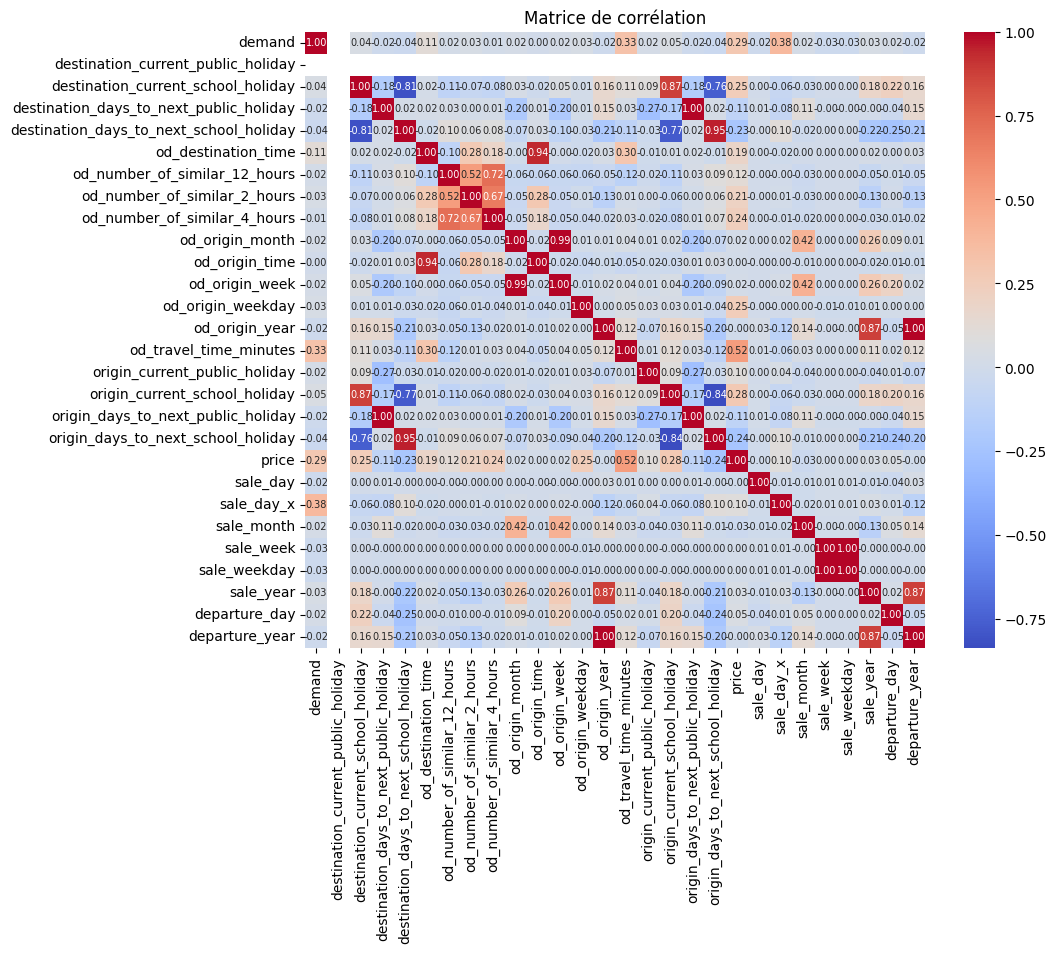

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les colonnes non numériques
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title('Matrice de corrélation')
plt.show()


La matrice de correlation nous montre déja qu'il y'a certaines variables qui n'apporteront pas d'information à notre analyse: notamment les variables **destination_current_public_holiday**

In [19]:
colonnes_a_supprimer = correlation_matrix.columns[correlation_matrix.isnull().all()]
colonnes_a_supprimer = colonnes_a_supprimer.append(pd.Index(['sale_date']))
colonnes_a_supprimer = colonnes_a_supprimer.append(pd.Index(['departure_date']))
df = df.drop(colonnes_a_supprimer, axis=1)
print("Colonnes supprimées :", colonnes_a_supprimer)
df.shape

Colonnes supprimées : Index(['destination_current_public_holiday', 'sale_date', 'departure_date'], dtype='object')


##### Ce bout de code teste s'il y'a une correlation entre la demande et le jour de vente du billet

In [21]:
from scipy.stats import f_oneway

# Par exemple, si 'day_of_week' est une colonne dans votre DataFrame df, vous pouvez utiliser :
groupes_jours = [df['demand'][df['sale_day'] == jour] for jour in df['sale_day'].unique()]

# Appliquer le test ANOVA
statistique_anova, p_value_anova = f_oneway(*groupes_jours)

# Afficher les résultats
print("Statistique de test ANOVA :", statistique_anova)
print("Valeur de p (p-value) :", p_value_anova)


Statistique de test ANOVA : 20.107622526110845
Valeur de p (p-value) : 7.213057495019991e-108


Ici on peut conclure qu'il y'a un lien entre la demande et le jour de vente du billet car la p-value < 0.05

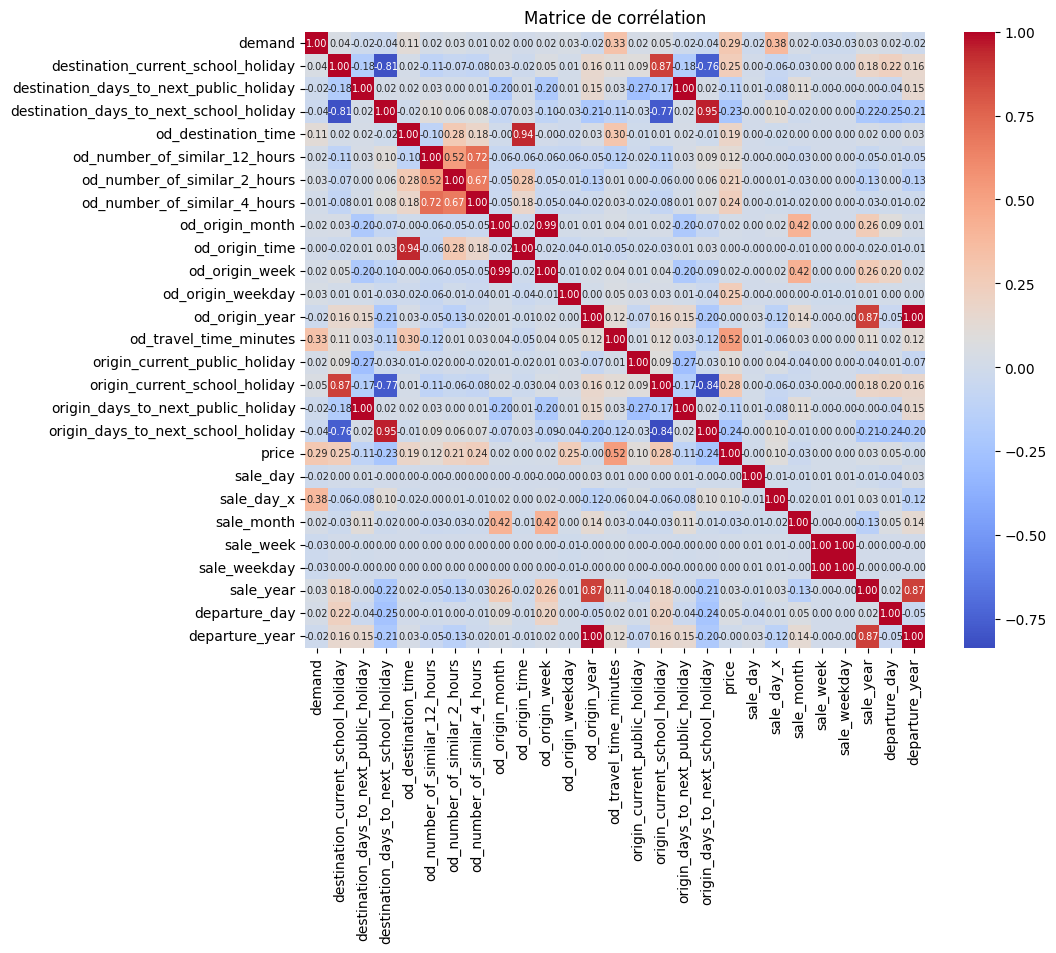

In [22]:
df_numeric1 = df.select_dtypes(include=['number'])
correlation_matrix1 = df_numeric1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title('Matrice de corrélation')
plt.show()

Plusieurs variables sont faiblement liées, et d'autres comme sale_week et sale_weekday, sale_month et sale_X_day sont fortement liées.

La variable qui nous interesse le plus étant la demande, elle est correlée au mois de vente, au nombre de jours avant le départ, au prix et au temps de voyage.

In [23]:
print(df.dtypes)
#print(df1['sale_weekday'].unique())
#print(df1.od_destination_time)

demand                                       int64
destination_current_school_holiday           int64
destination_days_to_next_public_holiday      int64
destination_days_to_next_school_holiday    float64
destination_station_name                    object
od_destination_time                          int64
od_number_of_similar_12_hours              float64
od_number_of_similar_2_hours               float64
od_number_of_similar_4_hours               float64
od_origin_month                              int64
od_origin_time                               int64
od_origin_week                               int64
od_origin_weekday                            int64
od_origin_year                               int64
od_travel_time_minutes                       int64
origin_current_public_holiday                int64
origin_current_school_holiday                int64
origin_days_to_next_public_holiday           int64
origin_days_to_next_school_holiday         float64
origin_station_name            

In [25]:
#df1['demand'].unique()
df['sale_month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
# Supposons que df1 ait n lignes
n = len(df1)

# Récupérer les données de df1 à partir de df_fusionne en utilisant l'index
df1_recupere = df.iloc[:n]
train = df1_recupere
df2_recupere = df.iloc[n:len(df)]
test = df2_recupere

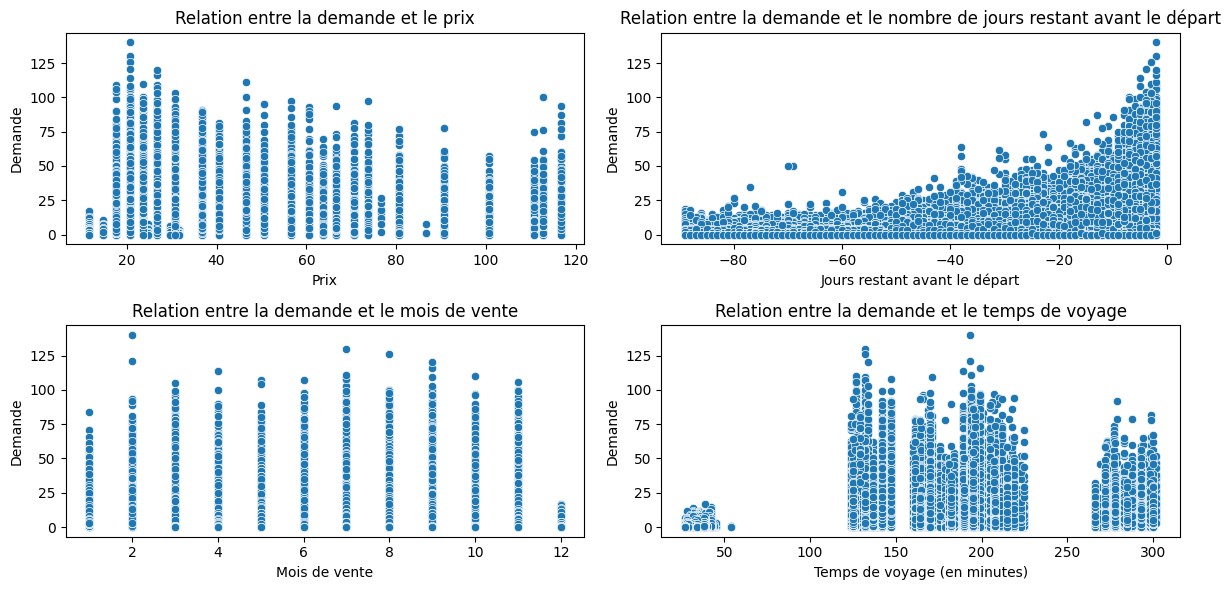

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure et des axes
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Premier subplot : Relation entre la demande et le prix
sns.scatterplot(x='price', y='demand', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Relation entre la demande et le prix')
axes[0, 0].set_xlabel('Prix')
axes[0, 0].set_ylabel('Demande')

# Deuxième subplot : Relation entre la demande et le nombre de jours restant avant le départ
sns.scatterplot(x='sale_day_x', y='demand', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Relation entre la demande et le nombre de jours restant avant le départ')
axes[0, 1].set_xlabel('Jours restant avant le départ')
axes[0, 1].set_ylabel('Demande')

# Troisième subplot : Relation entre la demande et le prix
sns.scatterplot(x='sale_month', y='demand', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Relation entre la demande et le mois de vente')
axes[1, 0].set_xlabel('Mois de vente')
axes[1, 0].set_ylabel('Demande')

# Quatrième subplot : Relation entre la demande et le nombre de jours restant avant le départ
sns.scatterplot(x='od_travel_time_minutes', y='demand', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Relation entre la demande et le temps de voyage')
axes[1, 1].set_xlabel('Temps de voyage (en minutes)')
axes[1, 1].set_ylabel('Demande')

# Affichage des graphiques
plt.tight_layout()
plt.show()

#### Notre objectif est de créer un modèle qui, étant donné le prix proposé et le nombre de jours restant avant le départ, peut prédire la demande de billets de train. La demande de billets de train, dans ce contexte, étant définie comme le nombre de personnes prêtes à acheter un billet à un certain prix pour un itinéraire donné et à une certaine période avant le départ.

On voit bien que dans le graphe de gauche en haut, plus le prix du billet augmente plus la demande diminue, et à droite en haut la figure présente une croissance presqu'exponentielle de la demande en fonction du nombre de jour restant avant le départ. Aussi, la demande est plud accentuée entre juin et septembre. La demande est forte pour les temps de voyage compris entre 125 et 215 minutes environ.

[0.15449594 0.10605833 0.09855595 0.09078542 0.08009346 0.07361415
 0.06715524 0.06322133 0.04660527 0.03999207 0.03862367 0.03521176
 0.02830036 0.02126801 0.01584581]
[0.15449594 0.26055427 0.35911023 0.44989565 0.52998911 0.60360326
 0.6707585  0.73397983 0.7805851  0.82057717 0.85920084 0.8944126
 0.92271296 0.94398096 0.95982677]


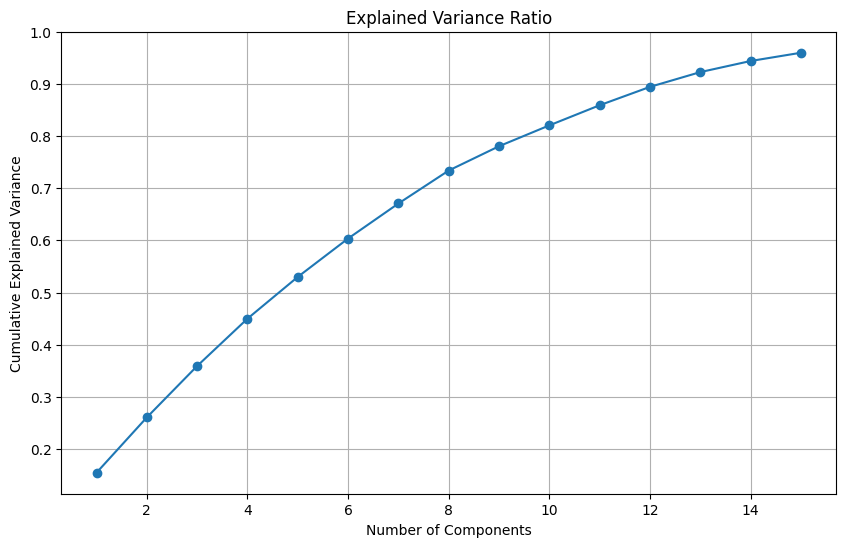

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sélection des colonnes numériques pour l'ACP
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = train[numeric_cols]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Appliquer l'ACP
pca = PCA(15)
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
print(pca.explained_variance_ratio_)
print(cumulative_explained_variance)
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [29]:
# Liste des noms de colonnes des variables catégorielles à encoder en one-hot
#colonnes_catégorielles = ['destination_station_name', 'origin_days_to_next_school_holiday', 'origin_station_name']
colonnes_catégorielles = ['destination_current_school_holiday', 'destination_days_to_next_public_holiday', 'destination_days_to_next_school_holiday', 'destination_station_name', 'od_origin_month', 'od_origin_week', 'od_origin_weekday', 'origin_current_public_holiday', 'origin_current_school_holiday', 'origin_days_to_next_public_holiday', 'origin_days_to_next_school_holiday', 'origin_station_name', 'sale_day', 'sale_month', 'sale_week', 'sale_weekday', 'departure_day']

# Encodage one-hot des variables catégorielles supplémentaires
#df_encoded_train = pd.get_dummies(train, columns=colonnes_catégorielles)
#df_encoded_test = pd.get_dummies(test, columns=colonnes_catégorielles)
df_encoded_train = pd.get_dummies(train, columns=colonnes_catégorielles, prefix=colonnes_catégorielles)
df_encoded_test = pd.get_dummies(test, columns=colonnes_catégorielles, prefix=colonnes_catégorielles)
df_encoded_train.dtypes


demand                             int64
od_destination_time                int64
od_number_of_similar_12_hours    float64
od_number_of_similar_2_hours     float64
od_number_of_similar_4_hours     float64
                                  ...   
departure_day_27                    bool
departure_day_28                    bool
departure_day_29                    bool
departure_day_30                    bool
departure_day_31                    bool
Length: 599, dtype: object

0n voit bien que les 12 premières composantes representent presque toute l'information de nos données (avoisine de 0.9).

### Sélection de variables

La régression Lasso pénalise les coefficients des variables moins importantes en les mettant à zéro. Cela permet une sélection automatique des variables les plus importantes.

In [38]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Séparation des données
X = df_encoded_train.drop(columns=['demand'])
y = df_encoded_train['demand']
X_test = df_encoded_test.drop(columns=['demand'])
y_test = df_encoded_test['demand']

# Initialiser le modèle Lasso et selectionner les variables basées sur le modèle Lasso
lasso = Lasso(alpha=0.1, random_state=42)

selector = SelectFromModel(lasso)
selector.fit(X, y)

# Afficher les variables sélectionnées
variables_selectionnees = X.columns[selector.get_support()]
print("Variables sélectionnées :", variables_selectionnees)
print("Variables sélectionnées :", len(variables_selectionnees))
X.shape, y.shape, X_test.shape, y_test.shape

Variables sélectionnées : Index(['od_destination_time', 'od_number_of_similar_12_hours',
       'od_number_of_similar_4_hours', 'od_origin_time',
       'od_travel_time_minutes', 'price', 'sale_day_x', 'sale_year',
       'destination_station_name_ag', 'origin_station_name_ag',
       'origin_station_name_cgm'],
      dtype='object')
Variables sélectionnées : 11


((632841, 598), (632841,), (19204, 136), (19204,))

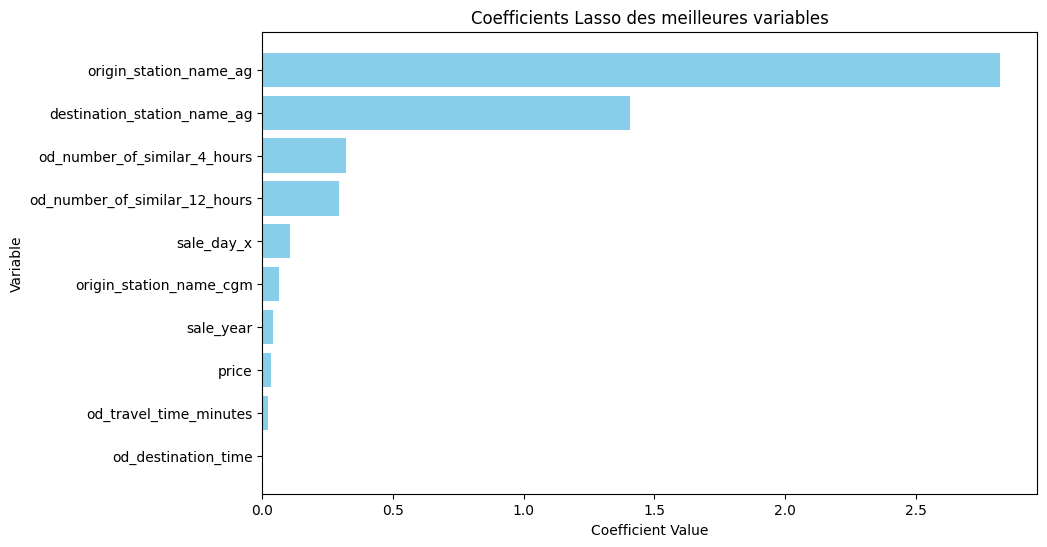

In [31]:
# Obtenir les indices et les noms des variables sélectionnées
selected_indices = np.where(selector.get_support())[0]
selected_variables = X.columns[selected_indices]

# Obtenir les coefficients correspondant aux variables sélectionnées et trier les coefficients par ordre décroissant
selected_coefficients = np.abs(selector.estimator_.coef_[selected_indices])
sorted_indices = selected_coefficients.argsort()[::-1]
sorted_variables = selected_variables[sorted_indices]
sorted_coefficients = selected_coefficients[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_variables[:10], sorted_coefficients[:10], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Coefficients Lasso des meilleures variables')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les variables les plus importantes en haut
plt.show()


On constate que les 04 variable qui sont correlées à la demande sont présentes parmi les meilleurs variables sélectionnées pas le Lasso, donc nous allons utiliser ces variables pour la suite de notre modélisation.

In [45]:
df_selected_train= X.loc[:, variables_selectionnees]
df_selected_test = X_test.loc[:, variables_selectionnees]

variables_to_encode = ['destination_station_name_ag', 'origin_station_name_ag', 'origin_station_name_cgm']

# Encoder les variables catégorielles
df_selected_train_new = pd.get_dummies(df_selected_train, columns=variables_to_encode, prefix=variables_to_encode, dtype=bool)
df_selected_train_new = df_selected_train_new.astype(int)
df_selected_test_new = pd.get_dummies(df_selected_test, columns=variables_to_encode, prefix=variables_to_encode, dtype=bool)
df_selected_test_new = df_selected_test_new.astype(int)
#df_selected_test_new


(        od_destination_time  od_number_of_similar_12_hours  \
 646080                  812                            5.0   
 646081                  812                            5.0   
 646082                  812                            5.0   
 646083                  812                            5.0   
 646084                  812                            5.0   
 ...                     ...                            ...   
 665400                 1252                            7.0   
 665401                 1252                            7.0   
 665402                 1252                            7.0   
 665403                 1252                            7.0   
 665404                 1252                            7.0   
 
         od_number_of_similar_4_hours  od_origin_time  od_travel_time_minutes  \
 646080                           3.0             785                      27   
 646081                           3.0             785                      27   

In [46]:
X_train = df_selected_train_new
X_test = df_selected_test_new
y_train = df_encoded_train['demand']
y_test = df_encoded_test['demand']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((632841, 14),
 (632841,),
 (19204, 14),
 (19204,),
         od_destination_time  od_number_of_similar_12_hours  \
 0                      1088                              5   
 1                      1088                              5   
 2                      1088                              5   
 3                      1088                              5   
 4                      1088                              5   
 ...                     ...                            ...   
 646075                  812                              5   
 646076                  812                              5   
 646077                  812                              5   
 646078                  812                              5   
 646079                  812                              5   
 
         od_number_of_similar_4_hours  od_origin_time  od_travel_time_minutes  \
 0                                  2             922                     166   
 1                          

## MODELE GRADIENT BOOSTING

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='huber', random_state=42) #ou ls ou lad pour la perte
gbfit = gb.fit(X_train, y_train)

y_pred = gbfit.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des métriques
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 19.76608619133936
Root Mean Squared Error: 4.445906678208548
Mean Absolute Error: 1.9006221481122978
R² Score: 0.6264611107915923
Mean Absolute Percentage Error: 1320277831527716.0


### OPTIMISATION DU MODELE
Je n'ai pris que trois valeurs pour tester, mais malgré celà çà n'a pas compilé, j'imagine en raison de la densité des données.
J'ai coimmencé en local, et lors de l'optimisation j'ai décidé d'aller sur Colab, mais jusque là je n'ai pas de résultat satisfaisant, vu que cà met tellement de temps à compiler.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'loss': ['ls', 'lad', 'huber']
}

# Initialisation du modèle
gb = GradientBoostingRegressor(random_state=42)

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et de la performance associée
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score de validation croisée (neg_mean_squared_error):", grid_search.best_score_)


Pour la cellule précédente je suis à plus de 2h de compilation et toujours pas de résultat.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


pipe = Pipeline(
    [
        #("Scaler", StandardScaler(with_mean=True, with_std=True)),
        ("PCA with 10 components", PCA(n_components=12)), ##avec 12 au lieu de 50 on a une meilleure accuracy sur le test
        (
            "Random Forest Classifier",
            GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='huber', max_depth=6)
            ),
    ]
)

pipe

# fit on train
pipe.fit(X_train, y_train)
#y_tr_pred = pipe.predict(X_train)

# predict on test
y_te_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des métriques
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 19.76608619133936
Root Mean Squared Error: 4.445906678208548
Mean Absolute Error: 1.9006221481122978
R² Score: 0.6264611107915923


## UN MODELE DE DEEP LEARNING

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler

# convertissons les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)  # Assurez-vous que y est un vecteur colonne
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)  # Assurez-vous que y_test est un vecteur colonne
print("Dimensions de X_train_tensor:", X_train_tensor.size())
print("Dimensions de y_train_tensor:", y_train_tensor.size())
print("Type de X_train_tensor:", X_train_tensor.dtype)
print("Type de y_train_tensor:", y_train_tensor.dtype)


#dimensions des entrées et des sorties
input_size = X_train_tensor.shape[1]  # Nombre de caractéristiques
output_size = 1  # Nombre de sorties (demande)

# Définir le modèle
class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Créer un DataLoader pour les données d'entraînement
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Définir le modèle, la fonction de perte et l'optimiseur
model = SimpleModel(input_size=input_size, hidden_size1=128, hidden_size2=64, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraîner le modèle
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Évaluation du modèle
model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor)       # prédictions sur les données de test
#MSE entre les prédictions et les vraies valeurs
mse = criterion(y_pred, y_test_tensor)
print("Mean Squared Error on Test Data:", mse.item())


Dimensions de X_train_tensor: torch.Size([632841, 14])
Dimensions de y_train_tensor: torch.Size([632841, 1])
Type de X_train_tensor: torch.float32
Type de y_train_tensor: torch.float32
Epoch [1/10], Loss: 44.53519821166992
Epoch [2/10], Loss: 17.309701919555664
Epoch [3/10], Loss: 1.3093584775924683
Epoch [4/10], Loss: 0.4689489006996155
Epoch [5/10], Loss: 11.974658966064453
Epoch [6/10], Loss: 178.48526000976562
Epoch [7/10], Loss: 3.5839855670928955
Epoch [8/10], Loss: 22.40285873413086
Epoch [9/10], Loss: 1.1766365766525269
Epoch [10/10], Loss: 8.64357852935791
Mean Squared Error on Test Data: 16.946216583251953


In [59]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

class SimpleModelWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.model = SimpleModel(input_size, hidden_size1, hidden_size2, output_size)

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        for epoch in range(self.num_epochs):
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

    def predict(self, X):
        return self.model(X)


Pour des problèmes de temps de compilation, je me suis limitée à une gridsearch de deux valeurs, mais on pourrait aller plus loin ou alors faire un randomized_search. \
Juste cette gridsearch a pris plus de deux heures et demie pour etre compilée.

In [ ]:
# hyperparamètres
param_grid = {
    'hidden_size1': [64, 128],
    'hidden_size2': [32, 64],
    'learning_rate': [0.001, 0.01],
    'num_epochs': [10, 20]
}

grid_search = GridSearchCV(estimator=SimpleModelWrapper(input_size=input_size, hidden_size1=128, hidden_size2=64, output_size=output_size, learning_rate=0.01, num_epochs=10),
                           param_grid=param_grid,
                           cv=3,  # Nombre de folds pour la CV
                           scoring='neg_mean_squared_error',  # Métrique de performance à optimiser
                           verbose=2)

grid_search.fit(X_train_tensor, y_train_tensor)

print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 3.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=20; total time= 7.0min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=20; total time= 6.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.001, num_epochs=20; total time= 5.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=10; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=10; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=10; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=20; total time= 6.3min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=20; total time= 5.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=32, learning_rate=0.01, num_epochs=20; total time= 6.4min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=10; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=10; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=10; total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=20; total time= 6.5min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=20; total time= 7.0min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.001, num_epochs=20; total time= 7.0min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=10; total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=10; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=10; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=20; total time= 5.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=20; total time= 5.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=64, hidden_size2=64, learning_rate=0.01, num_epochs=20; total time= 6.4min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=128, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=128, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=128, hidden_size2=32, learning_rate=0.001, num_epochs=10; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=128, hidden_size2=32, learning_rate=0.001, num_epochs=20; total time= 6.4min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

[CV] END hidden_size1=128, hidden_size2=32, learning_rate=0.001, num_epochs=20; total time= 7.0min


Ayant teste chaque cas de cette gridsearch en local, le model avec les paramètres était le meilleur. Je rappelle qu'on pourra augmenter les valeurs dans la grid pour mieux optimiser. La mean squared error est proche de 14.854723930358887

In [ ]:
best_model = SimpleModelWrapper(input_size=input_size, hidden_size1=128,
                                hidden_size2=32, output_size=output_size,
                                learning_rate=0.001, num_epochs=20)

best_model.fit(X_train_tensor, y_train_tensor)

# Prédire sur les données de test
y_pred = best_model.predict(X_test_tensor)

#MSE entre les prédictions et les vraies valeurs
mse = criterion(y_pred, y_test_tensor)
print("Mean Squared Error on Test Data:", mse.item())